In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try: # Currently, memory growth needs to be the same across GPUs 
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e: # Memory growth must be set before GPUs have been initialized print(e)
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import random
print(tf.__version__)

2.4.0


(1000,)
(1000,)


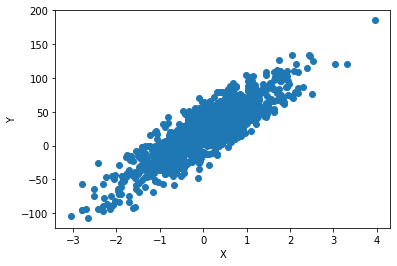

In [3]:
# 원점에 가깝게 하고 싶으면 bias줄임, 퍼지게 하고 싶으면 noise줄임
X,Y=make_regression(n_samples=1000,n_features=1,bias=20.0,noise=20.0,random_state=1)
X=np.squeeze(X)
print(X.shape)
print(Y.shape)
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
a=tf.Variable(random.random())
b=tf.Variable(random.random())

def function(X):
    y_pred=a*X+b
    return y_pred

# MSE
def compute_loss():
    y_pred = function(X)
    loss=tf.reduce_mean((Y-y_pred)**2)
    return loss

# 최적화 기법 
optimizer=tf.keras.optimizers.Adam(lr=0.07)

# 최적화  
for i in range(1000):
    optimizer.minimize(compute_loss,var_list=[a,b])
    if i%100==99:
        print(i,'a:',a.numpy(),'b:',b.numpy(),'loss:',compute_loss().numpy())

line_x=np.arange(min(X),max(X),0.01)
line_y=a*line_x+b

99 a: 6.8750095 b: 6.9479494 loss: 1569.9534
199 a: 12.9561 b: 12.1721735 loss: 1105.8553
299 a: 18.303448 b: 15.959657 loss: 813.8901
399 a: 22.902096 b: 18.411764 loss: 636.1544
499 a: 26.756618 b: 19.795422 loss: 530.4014
599 a: 29.894524 b: 20.45431 loss: 469.10074
699 a: 32.367172 b: 20.69881 loss: 434.99118
799 a: 34.247395 b: 20.746355 loss: 417.06375
899 a: 35.62357 b: 20.720596 loss: 408.26523
999 a: 36.591187 b: 20.679289 loss: 404.26016


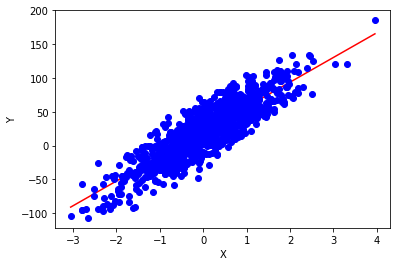

In [5]:
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Neural Network

In [4]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=6,activation='sigmoid',input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')
history=model.fit(X,Y,epochs=20,verbose=1) # 훈련 진행 상태 안 보이게
model.summary()

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 1159.2820
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 593.4258
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 548.3405
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 542.0041
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 537.7525
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 534.3874
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 499.2973
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 486.1348
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 448.8337
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 453.2093
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 457.1488
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 476.2862
Epoch 13/20
32/32 [=====

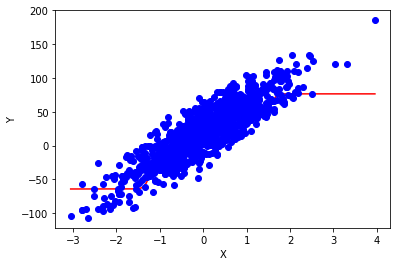

In [8]:
line_x=np.arange(min(X),max(X),0.01)
line_y=model.predict(line_x)
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

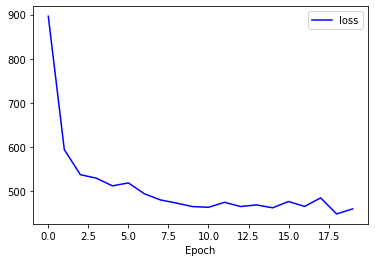

In [9]:
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'],'b-',label='loss')
plt.xlabel('Epoch')
plt.legend()

In [10]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}